<a href="https://colab.research.google.com/github/aryanpawar09/Stock_Closing_Price_Prediction/blob/main/Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Modules





In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading the data

In [31]:
df = pd.read_csv("/content/prices-split-adjusted.csv",header=0)

In [32]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [33]:
df.shape

(851264, 7)

In [34]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

# Filtering YAHOO data
Let us filter the data related to YAHOO stocks and majorly work on how to predict the closing prices of YAHOO.

In [35]:
df_yahoo = df[df.symbol=='YHOO']

In [36]:
df_yahoo.head(10)

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
3053,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0
3521,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0
3989,2010-01-13,YHOO,16.879999,16.900000,16.650000,16.980000,16955600.0
4457,2010-01-14,YHOO,16.809999,17.120001,16.799999,17.230000,16715600.0
4925,2010-01-15,YHOO,17.250000,16.820000,16.750000,17.250000,18415000.0


In [37]:
df_yahoo.shape

(1762, 7)

# Exploring YAHOO data

In [38]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105000,1.639070e+07
75%,37.335000,37.377500,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [39]:
df_yahoo.isnull().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


# Setting the Index for the Data Frame
Since we are dealing with time-series data, it makes sense to see the date column as the index of our data frame.

In [40]:
df_yahoo['date']=pd.to_datetime(df_yahoo['date'])

<ipython-input-40-2bf991961b55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yahoo['date']=pd.to_datetime(df_yahoo['date'])


In [41]:
print(df_yahoo.date.dtype)

datetime64[ns]


Observe the type of the column was previously "object", whereas it is of type "datetime64[ns]".

In [42]:
df_yahoo=df_yahoo.set_index("date")

In [43]:
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


# Setting the Frequency to Business Days
It is very important for a time series to have a frequency set, so as to consolidate that the data we are working on is free of any missing data.

Since we are working with stock-exchange time-series data, it makes sense to set the frequency of the time-series to business days, meaning the data is recorded for weekdays but not any weekends.

In [44]:
df_yahoo.shape

(1762, 6)

In [45]:
yahoo_data = df_yahoo.asfreq('B')

In [46]:
yahoo_data.shape

(1825, 6)

In [47]:
yahoo_data.tail(30)

,symbol,open,close,low,high,volume
date,,,,,,
2016-11-21,YHOO,41.439999,41.110001,40.939999,41.480000,11338000.0
2016-11-22,YHOO,41.200001,41.009998,40.830002,41.400002,8881200.0
2016-11-23,YHOO,40.910000,40.959999,40.549999,40.980000,3634900.0
2016-11-24,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-25,YHOO,41.080002,40.869999,40.709999,41.080002,2586900.0
2016-11-28,YHOO,40.849998,41.450001,40.740002,41.700001,6765800.0
2016-11-29,YHOO,41.430000,41.599998,41.119999,41.830002,7246100.0
2016-11-30,YHOO,41.619999,41.020000,40.880001,41.669998,7624500.0
2016-12-01,YHOO,41.000000,39.630001,39.529999,41.040001,12614600.0


In [48]:
yahoo_data.isnull().sum()

,0
symbol,63
open,63
close,63
low,63
high,63
volume,63


# Getting the Dates of Missing Values
Let us see if the missing values are due to the official holidays of NYSE or due to some other unknown factors.

In case the dates are of official holidays, then those values can't be accounted for as missing. Else, we have to come up with ways to fill those missing values.

So first, let us first filter the null rows and get the dates of these missing values.

In [49]:
null_data=yahoo_data[yahoo_data.isnull().any(axis=1)]

In [50]:
null_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
null_data.shape

(63, 6)

In [52]:
null_dates = null_data.index.tolist()
print(null_dates)

[Timestamp('2010-01-18 00:00:00'), Timestamp('2010-02-15 00:00:00'), Timestamp('2010-04-02 00:00:00'), Timestamp('2010-05-31 00:00:00'), Timestamp('2010-07-05 00:00:00'), Timestamp('2010-09-06 00:00:00'), Timestamp('2010-11-25 00:00:00'), Timestamp('2010-12-24 00:00:00'), Timestamp('2011-01-17 00:00:00'), Timestamp('2011-02-21 00:00:00'), Timestamp('2011-04-22 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-07-04 00:00:00'), Timestamp('2011-09-05 00:00:00'), Timestamp('2011-11-24 00:00:00'), Timestamp('2011-12-26 00:00:00'), Timestamp('2012-01-02 00:00:00'), Timestamp('2012-01-16 00:00:00'), Timestamp('2012-02-20 00:00:00'), Timestamp('2012-04-06 00:00:00'), Timestamp('2012-05-28 00:00:00'), Timestamp('2012-07-04 00:00:00'), Timestamp('2012-09-03 00:00:00'), Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00'), Timestamp('2012-11-22 00:00:00'), Timestamp('2012-12-25 00:00:00'), Timestamp('2013-01-01 00:00:00'), Timestamp('2013-01-21 00:00:00'), Timestamp('20

# Filtering out the Holidays
Let us check if the dates of missing values fall in any holidays official for NYSE. A quick check at the NYSE official website would help us know the list of official holidays of NYSE.

In [53]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


# Getting the Modified Data

In [54]:
yahoo_data.shape

(1825, 6)

In [55]:
modified_df=yahoo_data.drop(holidays)

In [56]:
modified_df.shape

(1764, 6)

# Filling the Missing Values
Now that we know that there are two missing values in the data, we have to fill those missing values.

In [57]:
print("Before filling missing files:\n",modified_df.isna().sum())

Before filling missing files:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64


In [58]:
modified_df = modified_df.bfill(axis='rows')

In [59]:
print("after filling missing files:\n",modified_df.isna().sum())

after filling missing files:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


# Visualizing YAHOO Data
Now, let us have a look at how the closing values of YAHOO data look like.

In [60]:
def plotter(code):
  global closing_stock
  plt.subplot(211)
  company_close = modified_df[modified_df['symbol']==code]
  company_close = company_close.close.values.astype('float32')
  company_close = company_close.reshape(-1,1)
  closing_stock = company_close

  plt.xlabel("Time")
  plt.ylabel(code+" close stock prices")
  plt.title("Prices Vs Time")
  plt.grid(True)

  plt.plot(company_close,'b')
  plt.show()

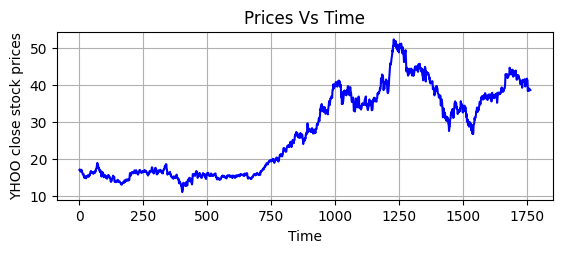

In [61]:
plotter("YHOO")

# Splitting the Data
Let us split the closing_stock into 3 parts, for training, validation, and testing purposes.

Let us have 80% of the data in the train set, 10% in the validation set, and the remaining 10% in the test set.

In [62]:
n_train = int(len(closing_stock)*0.80)
n_remaining= len(closing_stock)-n_train

n_val = int(n_remaining*0.5)
n_test = n_remaining-n_val
print("Train Samples : ",n_train)
print("Validation Samples : ",n_val)
print("Test Samples : ",n_test)


Train Samples :  1411
Validation Samples :  176
Test Samples :  177


In [63]:
train_data = closing_stock[:n_train]
print(train_data.shape)

(1411, 1)


In [64]:
val_data = closing_stock[n_train : n_train+n_val]
print(val_data.shape)

(176, 1)


In [65]:
test_data = closing_stock[n_train+n_val:]
print(test_data.shape)

(177, 1)


# Feature Scaling
Let us then use MinMaxScaler, a module from sklearn library to scale the values into the range of 0 and 1.

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler(feature_range=(0,1))

In [68]:
train = scaler.fit_transform(train_data)

In [69]:
val = scaler.fit_transform(val_data)

In [70]:
test = scaler.fit_transform(test_data)

# Creating the Dataset
 We are going to use GRU, which is one of the quite useful deep learning algorithms to deal with time-series data.

It expects the input data to be three-dimensional. The first dimension indicates the batch size, the second dimension is the timestamps and the third dimension is the number of features.

In [77]:
def create_database(data , n_features):
    dataX , dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]  # Selecting n_features columns
        dataX.append(a)
        dataY.append(data[i+n_features, 0])
    return np.array(dataX).reshape(-1, n_features), np.array(dataY)


In [78]:
n_features=2

In [79]:
trainX , trainY = create_database(train,n_features)
valX , valY = create_database(val,n_features)
testX , testY = create_database(test,n_features)

In [80]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape , testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [81]:
trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
valX = valX.reshape(valX.shape[0],1,valX.shape[1])
testX = testX.reshape(testX.shape[0],1,testX.shape[1])

In [83]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


# Building the Model
Finally, we have reached the modeling part.

As discussed previously, we shall use a GRU based model.

Firstly, let us import the necessary TensorFlow and Scikit-Learn libraries.

Next, we shall build the model by adding layers, compiling it, and then fitting the model on the train data.

A bit about the model we are going to build:

The model we are going to use is a stacked GRU.
So the output of one GRU layer should act as the input to the next GRU layer stacked above the former one and so on.

In [85]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [110]:
# Define the input layer first
model = keras.Sequential([
    keras.Input(shape=(1, n_features)),  # ✅ Correct way to define input shape

    # First GRU Layer
    layers.GRU(units=100, return_sequences=True, activation='tanh'),
    layers.Dropout(0.2),

    # Second GRU Layer
    layers.GRU(units=150, return_sequences=True, activation='tanh'),
    layers.Dropout(0.2),

    # Third GRU Layer (Final GRU)
    layers.GRU(units=100, activation='tanh'),
    layers.Dropout(0.2),

    # Output Layer
    layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear')
])


In [111]:
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0005),metrics = ['mean_squared_error'])

In [112]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_15 (GRU)                         │ (None, 1, 100)              │          31,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_16 (GRU)                         │ (None, 1, 150)              │         113,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 1, 150)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_17 (GRU)                         │ (None, 100)                 │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,301 (860.55 KB)

 Trainable params: 220,301 (860.55 KB)

 Non-trainable params: 0 (0.00 B)

None


In [113]:
history = model.fit(trainX,trainY,epochs=100, batch_size=128 , verbose=1 , validation_data=(valX,valY))

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.1665 - mean_squared_error: 0.1665 - val_loss: 0.1528 - val_mean_squared_error: 0.1528
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0

In [114]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)


Train Score:
MSE: 0.00020 , RMSE: 0.01
Validation Score:
MSE: 0.00490 , RMSE: 0.07
Test Score:
MSE: 0.00458 , RMSE: 0.07


# Visualizing Loss vs Epochs
Now that we have built the model, let us visualize how the model loss varies with respect to the epoch for the train data and validation data using matplotlib.

In [115]:
print(history.history.keys())


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


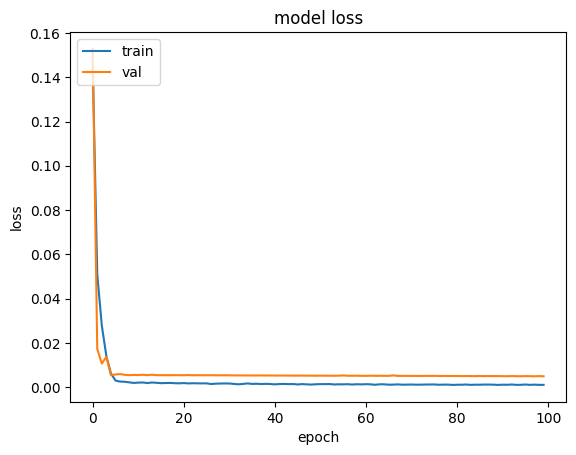

In [116]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Visualizing Predictions vs Ground Truths
Let us now plot the predicted stock prices vs the actual ground truth values.



In [117]:
pred = model.predict(testX)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


In [119]:
pred = scaler.inverse_transform(pred)
print(pred[:10])

[[37.612564]
 [37.382896]
 [37.20915 ]
 [37.062325]
 [36.775455]
 [36.63719 ]
 [36.597794]
 [36.24684 ]
 [36.030823]
 [36.610897]]


In [120]:
testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


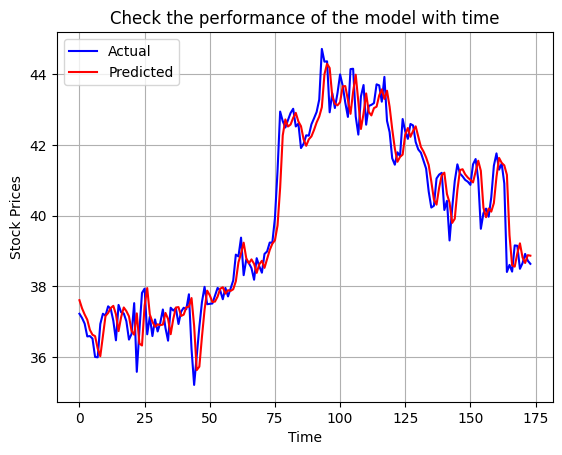

In [121]:
plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()

In [124]:
model.save("gru_stock_model.keras")


In [125]:
from google.colab import files
files.download("gru_stock_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>